# Titanic

In [18]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

In [3]:
import pandas as pd

In [17]:
TITANIC_PATH

'datasets\\titanic'

In [247]:
def load_titanic_data(filename, titanic_path = TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [248]:
train_data = load_titanic_data('train.csv')
test_data = load_titanic_data('test.csv')

In [435]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [436]:
test_data.shape

(418, 10)

In [249]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [250]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [251]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [252]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
len(train_data)

891

In [26]:
len(test_data)

418

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [29]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [253]:
# Categorical Variables
titanic_cat = ['Sex', 'Ticket',  'Cabin', 'Embarked']

In [39]:
for cat in titanic_cat:
    print(cat, ':\n', train_data[cat].value_counts(), '\n\n')

Sex :
 male      577
female    314
Name: Sex, dtype: int64 


Ticket :
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 


Cabin :
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 


Embarked :
 S    644
C    168
Q     77
Name: Embarked, dtype: int64 




In [42]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [53]:
# only in a Jupyter notebook
%matplotlib inline

import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

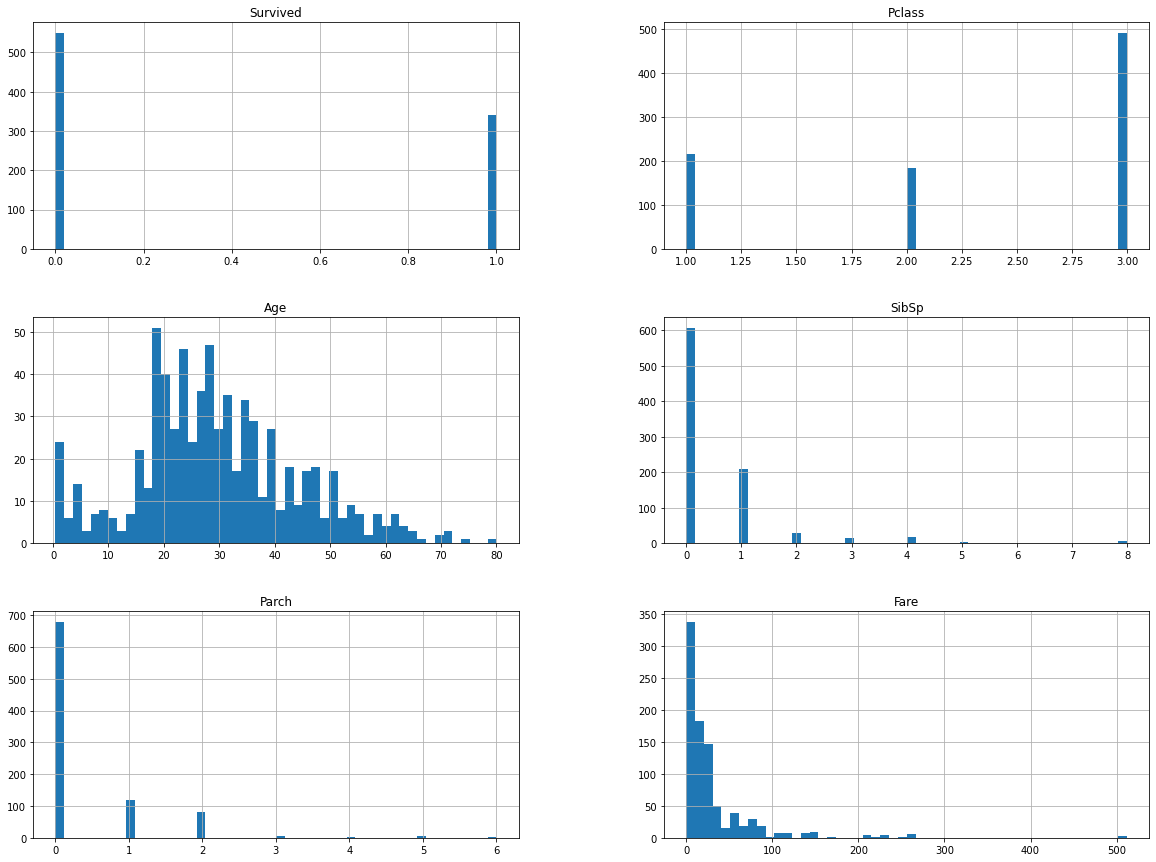

In [54]:
train_data.hist(bins=50, figsize=(20, 15))

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state = 42)

In [256]:
corr_matrix = train_data.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096066
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096066,0.159651,0.216225,1.000000


In [62]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [257]:
from pandas.plotting import scatter_matrix

In [258]:
titanic_num = ['Survived', 'Pclass','Age','SibSp','Parch','Fare']

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

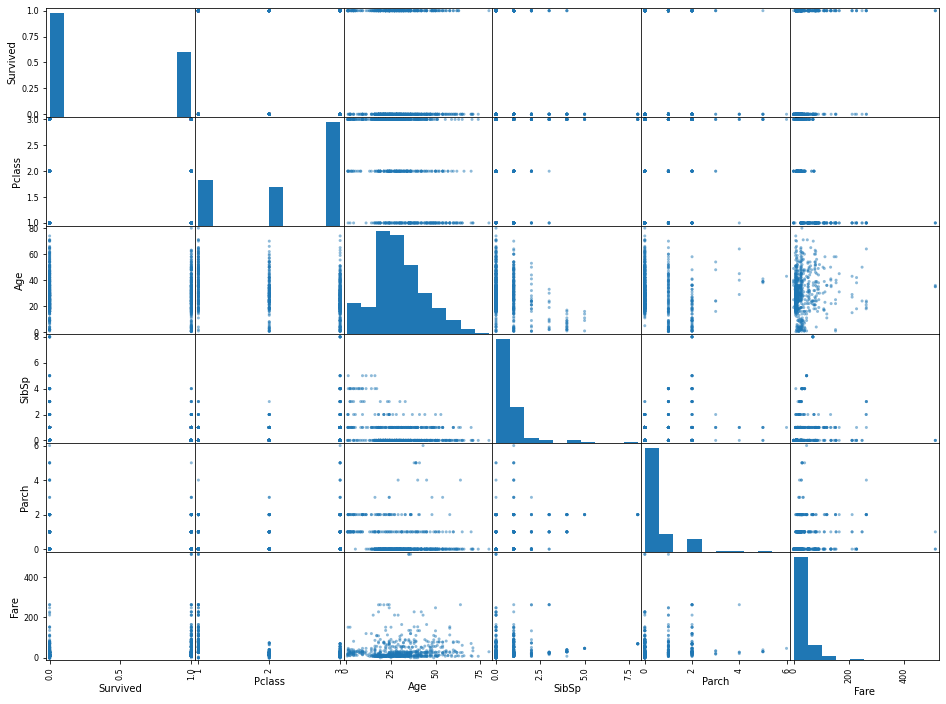

In [259]:
scatter_matrix(train_data[titanic_num], figsize=(16, 12))

In [260]:
X_train_set = train_set.drop('Survived', axis = 1)
y_train_set = train_set['Survived'].copy()
X_test_set = test_set.drop('Survived', axis = 1)
y_test_set = test_set['Survived'].copy()

In [261]:
X_train_set.shape

(712, 10)

In [75]:
y_train_set.shape

(712,)

In [419]:
X_test_set.shape

(179, 10)

In [418]:
y_test_set.shape

(179,)

In [262]:
sample_incomplete_rows = X_train_set[X_train_set.isnull().any(axis=1)]
sample_incomplete_rows

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
362,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...
21,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S


In [349]:
X_train_set_wc = X_train_set.drop(['Name', 'Ticket', "Cabin"], axis=1)       # option 2

In [350]:
sample_incomplete_rows = X_train_set_wc[X_train_set_wc.isnull().any(axis=1)]
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
30,3,male,NaN,0,0,7.8958,S
56,1,male,NaN,0,0,35.5000,S
534,3,female,NaN,0,2,22.3583,C
496,3,male,NaN,0,0,14.4583,C
469,3,male,NaN,0,0,7.7250,Q
...,...,...,...,...,...,...,...
331,3,female,NaN,2,0,23.2500,Q
215,3,male,NaN,1,0,7.7500,Q
467,2,male,NaN,0,0,0.0000,S


In [351]:
X_train_set_wc = X_train_set_wc.dropna(subset=["Embarked"])
X_train_set_wc

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
332,1,male,45.5,0,0,28.5000,S
734,2,male,23.0,0,0,13.0000,S
383,3,male,32.0,0,0,7.9250,S
705,3,male,26.0,1,0,7.8542,S
814,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
107,3,female,21.0,0,0,7.6500,S
271,1,male,NaN,0,0,31.0000,S
861,3,male,41.0,2,0,14.1083,S


In [352]:
X_train_set_wc[X_train_set_wc.isnull().any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
30,3,male,NaN,0,0,7.8958,S
56,1,male,NaN,0,0,35.5000,S
534,3,female,NaN,0,2,22.3583,C
496,3,male,NaN,0,0,14.4583,C
469,3,male,NaN,0,0,7.7250,Q
...,...,...,...,...,...,...,...
331,3,female,NaN,2,0,23.2500,Q
215,3,male,NaN,1,0,7.7500,Q
467,2,male,NaN,0,0,0.0000,S


In [353]:
y_train_set_wc = y_train_set.copy()

In [354]:
y_train_set_wc = y_train_set_wc.drop((X_train_set[pd.isna(X_train_set.Embarked)].index), axis=0)

In [355]:
list(X_train_set[pd.isna(X_train_set.Embarked)].index)

[830, 62]

In [356]:
sample_incomplete_rows= X_train_set_wc[X_train_set_wc.isnull().any(axis=1)]
sample_incomplete_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
30,3,male,NaN,0,0,7.8958,S
56,1,male,NaN,0,0,35.5000,S
534,3,female,NaN,0,2,22.3583,C
496,3,male,NaN,0,0,14.4583,C
469,3,male,NaN,0,0,7.7250,Q
...,...,...,...,...,...,...,...
331,3,female,NaN,2,0,23.2500,Q
215,3,male,NaN,1,0,7.7500,Q
467,2,male,NaN,0,0,0.0000,S


In [357]:
sample_incomplete_rows[sample_incomplete_rows[['Age']].isnull().any(axis=1)]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
30,3,male,NaN,0,0,7.8958,S
56,1,male,NaN,0,0,35.5000,S
534,3,female,NaN,0,2,22.3583,C
496,3,male,NaN,0,0,14.4583,C
469,3,male,NaN,0,0,7.7250,Q
...,...,...,...,...,...,...,...
331,3,female,NaN,2,0,23.2500,Q
215,3,male,NaN,1,0,7.7500,Q
467,2,male,NaN,0,0,0.0000,S


In [359]:
X_train_set_wc

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
332,1,male,45.5,0,0,28.5000,S
734,2,male,23.0,0,0,13.0000,S
383,3,male,32.0,0,0,7.9250,S
705,3,male,26.0,1,0,7.8542,S
814,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
107,3,female,21.0,0,0,7.6500,S
271,1,male,NaN,0,0,31.0000,S
861,3,male,41.0,2,0,14.1083,S


In [366]:
X_train_set_wc.dtypes


Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [327]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [367]:
# Numerical Variables
num_attribs = ['Pclass', 'Age','SibSp','Parch','Fare']

# Categorical Variables
cat_attribs = ['Sex', 'Embarked']

In [368]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median'))])

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), 
                                   ('cat',  OneHotEncoder(), cat_attribs)
                                  ])

X_train_set_prepared = full_pipeline.fit_transform(X_train_set_wc)

In [374]:
X_train_set_prepared

array([[ 1. , 45.5,  0. , ...,  0. ,  0. ,  1. ],
       [ 2. , 23. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 3. , 32. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 3. , 41. ,  2. , ...,  0. ,  0. ,  1. ],
       [ 1. , 14. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 1. , 21. ,  0. , ...,  0. ,  0. ,  1. ]])

In [312]:
X_train_set_wc[cat_attribs]

,Name,Sex,Ticket,Embarked
PassengerId,,,,
332,"Partner, Mr. Austen",male,113043,S
734,"Berriman, Mr. William John",male,28425,S
383,"Tikkanen, Mr. Juho",male,STON/O 2. 3101293,S
705,"Hansen, Mr. Henrik Juul",male,350025,S
814,"Andersson, Miss. Ebba Iris Alfrida",female,347082,S
...,...,...,...,...
107,"Salkjelsvik, Miss. Anna Kristine",female,343120,S
271,"Cairns, Mr. Alexander",male,113798,S
861,"Hansen, Mr. Claus Peter",male,350026,S


In [306]:
X_train_set_wc[num_attribs]

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
332,1,45.5,0,0,28.5000
734,2,23.0,0,0,13.0000
383,3,32.0,0,0,7.9250
705,3,26.0,1,0,7.8542
814,3,6.0,4,2,31.2750
...,...,...,...,...,...
107,3,21.0,0,0,7.6500
271,1,NaN,0,0,31.0000
861,3,41.0,2,0,14.1083


In [299]:
X_train_set_wc_num

array([[  1.    ,  45.5   ,   0.    ,   0.    ,  28.5   ],
       [  2.    ,  23.    ,   0.    ,   0.    ,  13.    ],
       [  3.    ,  32.    ,   0.    ,   0.    ,   7.925 ],
       ...,
       [  3.    ,  41.    ,   2.    ,   0.    ,  14.1083],
       [  1.    ,  14.    ,   1.    ,   2.    , 120.    ],
       [  1.    ,  21.    ,   0.    ,   1.    ,  77.2875]])

In [324]:
len(y_train_set_wc)

710

In [325]:
y_train_set_wc

PassengerId
332    0
734    0
383    0
705    0
814    0
      ..
107    1
271    0
861    0
436    1
103    0
Name: Survived, Length: 710, dtype: int64

Stochastic Gradient Descent (SGD) Classifier

In [321]:
from sklearn.linear_model import SGDClassifier

In [375]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_set_prepared, y_train_set_wc)

SGDClassifier(random_state=42)

In [378]:
some_data = X_train_set_wc.iloc[:5]
some_labels = y_train_set_wc.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [402]:
print('Predictions:', sgd_clf.predict(some_data_prepared))

Predictions: [1 1 1 0 0]


In [380]:
print('Labels:', list(some_labels))

Labels: [0, 0, 0, 0, 0]


In [469]:
from sklearn.model_selection import cross_val_score
sgd_score = cross_val_score(sgd_clf, X_train_set_prepared, y_train_set_wc, cv=5, scoring='accuracy')
print(sgd_score)
print(sgd_score.mean())

[0.73943662 0.62676056 0.73239437 0.74647887 0.71126761]
0.7112676056338028


In [411]:
from sklearn.model_selection import cross_val_predict
y_train_set_wc_pred = cross_val_predict(sgd_clf, X_train_set_prepared, y_train_set_wc, cv=5)

In [412]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_set_wc, y_train_set_wc_pred)

array([[354,  90],
       [115, 151]], dtype=int64)

In [415]:
y_train_perfect_prediction = y_train_set_wc
confusion_matrix(y_train_set_wc, y_train_perfect_prediction)

array([[444,   0],
       [  0, 266]], dtype=int64)

In [416]:
from sklearn.metrics import precision_score, recall_score

print('Precision : ', precision_score(y_train_set_wc, y_train_set_wc_pred))
print('Recall : ', recall_score(y_train_set_wc, y_train_set_wc_pred))

Precision :  0.6265560165975104
Recall :  0.5676691729323309


In [420]:
X_test_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
710,3,"Moubarek, Master. Halim Gonios ('William George')",male,NaN,1,1,2661,15.2458,NaN,C
440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
721,2,"Harper, Miss. Annie Jessie 'Nina'",female,6.0,0,1,248727,33.0000,NaN,S
40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [423]:
X_test_set_wc = X_test_set.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X_test_set_wc

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
710,3,male,NaN,1,1,15.2458,C
440,2,male,31.0,0,0,10.5000,S
841,3,male,20.0,0,0,7.9250,S
721,2,female,6.0,0,1,33.0000,S
40,3,female,14.0,1,0,11.2417,C
...,...,...,...,...,...,...,...
434,3,male,17.0,0,0,7.1250,S
774,3,male,NaN,0,0,7.2250,C
26,3,female,38.0,1,5,31.3875,S


In [425]:
X_test_set_wc[X_test_set_wc.isnull().any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
710,3,male,NaN,1,1,15.2458,C
301,3,female,NaN,0,0,7.7500,Q
486,3,female,NaN,3,1,25.4667,S
654,3,female,NaN,0,0,7.8292,Q
539,3,male,NaN,0,0,14.5000,S
794,1,male,NaN,0,0,30.6958,C
236,3,female,NaN,0,0,7.5500,S
199,3,female,NaN,0,0,7.7500,Q
740,3,male,NaN,0,0,7.8958,S


In [426]:
X_test_set_prepared = full_pipeline.transform(X_test_set_wc)
X_test_set_prepared

array([[ 3., 28.,  1., ...,  1.,  0.,  0.],
       [ 2., 31.,  0., ...,  0.,  0.,  1.],
       [ 3., 20.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 38.,  1., ...,  0.,  0.,  1.],
       [ 2., 17.,  0., ...,  0.,  0.,  1.],
       [ 3.,  4.,  1., ...,  0.,  0.,  1.]])

In [476]:
X_test_set_prepared.shape

(179, 10)

In [427]:
y_test_pred = sgd_clf.predict(X_test_set_prepared)
y_test_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [429]:
#from sklearn.model_selection import cross_val_predict
y_test_set_pred = cross_val_predict(sgd_clf, X_test_set_prepared, y_test_set, cv=5)

In [431]:
cross_val_score(sgd_clf, X_test_set_prepared, y_test_set, cv=5)

array([0.58333333, 0.77777778, 0.75      , 0.75      , 0.62857143])

In [433]:
from sklearn.metrics import f1_score
f1_score(y_test_set_pred, y_test_set, average='macro')

0.6586864406779662

In [434]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_set_pred, y_test_set)

0.6983240223463687

K-Neighbors Classifier (k=5 per default)

In [437]:
from sklearn.neighbors import KNeighborsClassifier

In [438]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_set_prepared, y_train_set_wc)

KNeighborsClassifier()

In [439]:
knn_clf.predict(some_data_prepared)

array([0, 0, 0, 0, 0], dtype=int64)

In [468]:
from sklearn.model_selection import cross_val_score
knn_score = cross_val_score(knn_clf, X_train_set_prepared, y_train_set_wc, cv=5, scoring='accuracy')
print(knn_score)
print(knn_score.mean())

[0.6971831  0.66197183 0.71830986 0.71830986 0.73239437]
0.7056338028169014


In [441]:
y_train_set_wc_knn_pred = cross_val_predict(knn_clf, X_train_set_prepared, y_train_set_wc, cv=5)

In [442]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_set_wc, y_train_set_wc_knn_pred)

array([[351,  93],
       [116, 150]], dtype=int64)

In [ ]:
array([[354,  90],
       [115, 151]], dtype=int64)

In [443]:
print('Precision : ', precision_score(y_train_set_wc, y_train_set_wc_knn_pred))
print('Recall : ', recall_score(y_train_set_wc, y_train_set_wc_knn_pred))

Precision :  0.6172839506172839
Recall :  0.5639097744360902


In [444]:
y_test_knn_pred = knn_clf.predict(X_test_set_prepared)

In [445]:
cross_val_score(knn_clf, X_test_set_prepared, y_test_set, cv=5)

array([0.47222222, 0.77777778, 0.75      , 0.75      , 0.77142857])

In [447]:
f1_score(y_test_knn_pred, y_test_set, average='macro')

0.6909718696049558

In [448]:
accuracy_score(y_test_knn_pred, y_test_set)

0.7150837988826816

In [ ]:
Grid Search using knn

In [450]:
from sklearn.model_selection import GridSearchCV

In [456]:
knn_clf = KNeighborsClassifier()

param_grid = [{
    'n_neighbors': [6, 7, 8, 9],
    'weights': ['uniform', 'distance']
}]

grid_search_nei = GridSearchCV(knn_clf, 
                                param_grid, 
                                cv=5, 
                                scoring='accuracy', 
                                verbose=2)

grid_search_nei.fit(X_train_set_prepared, y_train_set_wc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=6, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=6, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=6, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=6, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=6, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=6, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=7, weig

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=2)

In [457]:
grid_search_nei.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [458]:
grid_search_nei.best_score_

0.7295774647887324

In [459]:
y_train_pred = grid_search_nei.predict(X_test_set_prepared)
accuracy_score(y_test_knn_pred, y_test_set)

0.7150837988826816

Random Forest Classifier

In [460]:
from sklearn.ensemble import RandomForestClassifier

In [461]:
rdf_clf = RandomForestClassifier()
rdf_clf.fit(X_train_set_prepared, y_train_set_wc)

RandomForestClassifier()

In [462]:
rdf_clf.predict(some_data_prepared)

array([0, 0, 0, 0, 0], dtype=int64)

In [467]:
rdf_score = cross_val_score(rdf_clf, X_train_set_prepared, y_train_set_wc, cv=5, scoring='accuracy')
print(rdf_score)
print(rdf_score.mean())

[0.79577465 0.75352113 0.79577465 0.77464789 0.81690141]
0.7873239436619718


In [464]:
y_train_set_wc_rdf_pred = cross_val_predict(rdf_clf, X_train_set_prepared, y_train_set_wc, cv=5)

In [465]:
print('Precision : ', precision_score(y_train_set_wc, y_train_set_wc_rdf_pred))
print('Recall : ', recall_score(y_train_set_wc, y_train_set_wc_rdf_pred))

Precision :  0.7391304347826086
Recall :  0.7030075187969925


In [471]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [475]:
test_data_tr = full_pipeline.transform(test_data)
test_data_tr.shape

(418, 10)

In [480]:
y_test_predicted = rdf_clf.predict(test_data_tr)

In [482]:
y_test_predicted.shape

(418,)

In [483]:
test_data.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [484]:
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': y_test_predicted})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [485]:
output.to_csv('titanic_pred.csv', index=False)